In [1]:
# SH-I

In [2]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('cfg_glycans.csv')

monomers = ['Fuc', 'GalNAc', 'Gal', 'GlcNAc', 'GlcA', 'Glc', 'KDN', 'Man', 'Neu5,9Ac2', 'Neu5Ac', 'Neu5Gc']
link_types = ['a', 'b']
occupancies = ['1', '2', '3', '4', '5', '6']
branches = ['[', ']']
sul_phos = ['3S', '4S', '6S', '6P']
linkages = ['Sp0', 'Sp8', 'Sp9', 'Sp10', 'Sp11', 'Sp12', 'Sp13', 'Sp14', 'Sp15', 'Sp16', 'Sp17', 'Sp18', 'Sp19', 'Sp20', 'Sp21', 'Sp22', 'Sp23', 'Sp24', 'Sp25', 'MDPLys']

In [4]:
def encoder(glycan):
    
    glycan_list = []
    linker_list = []

    for unit in glycan.split('-')[:-1]:

        mono_list = []
        type_list = []
        occu_list = []
        bran_list = []
        supo_list = []

        for monomer in monomers:

            mono_list.append(unit.count(monomer + '('))

        glycan_list.append(mono_list)

        for link_type in link_types:

            type_list.append(unit.split('(')[-1].count(link_type))

        glycan_list.append(type_list)

        for occupancy in occupancies:

            occu_list.append((unit[0] + unit[-1]).count(occupancy))

        glycan_list.append(occu_list)

        for branch in branches:

            bran_list.append(unit.count(branch))

        glycan_list.append(bran_list)

        for supo in sul_phos:

            supo_list.append(unit.count(supo))
        
        supo_list = supo_list + ([0] * 6)

        glycan_list.append(supo_list)

    for linkage in linkages:

        linker_list.append(glycan.split('-')[-1].count(linkage))

    glycan_vector = np.array(list(itertools.chain.from_iterable(glycan_list)), dtype = float)
    linker_vector = np.array(linker_list, dtype = float)
    zeroes_vector = np.zeros(1240 - (len(glycan_vector) + len(linker_vector)), dtype = float)
    
    vector = np.concatenate((zeroes_vector, glycan_vector, linker_vector)).reshape((-1, 1))
    
    assert len(vector) == 1240, 'Vector length is not 1200 bruh'
    assert np.amax(vector) < 2, 'Vector contains value more than 1 bruh'
    
    return vector

In [5]:
glycan = data['IUPAC'][588]

glycan_list = []
linker_list = []

for unit in glycan.split('-')[:-1]:
    
    mono_list = []
    type_list = []
    occu_list = []
    bran_list = []
    supo_list = []
    
    print(unit)
    
    for monomer in monomers:
        
        mono_list.append(unit.count(monomer + '('))
    
    glycan_list.append(mono_list)
    
    for link_type in link_types:
        
        type_list.append(unit.split('(')[-1].count(link_type))
    
    glycan_list.append(type_list)
    
    for occupancy in occupancies:
        
        occu_list.append((unit[0] + unit[-1]).count(occupancy))
    
    glycan_list.append(occu_list)
    
    for branch in branches:
        
        bran_list.append(unit.count(branch))
    
    glycan_list.append(bran_list)
    
    for supo in sul_phos:
        
        supo_list.append(unit.count(supo))
    
    supo_list = supo_list
    
    print(mono_list)
    print(type_list)
    print(occu_list)
    print(bran_list)
    print(supo_list)
    print('')
    
    glycan_list.append(supo_list)

link_list = []

print(glycan.split('-')[-1])

for linkage in linkages:

    linker_list.append(glycan.split('-')[-1].count(linkage))

print(linker_list[:10])
print(linker_list[10:])

glycan_vector = np.array(list(itertools.chain.from_iterable(glycan_list)))
linker_vector = np.array(linker_list)
zeroes_vector = np.zeros(920 - (len(glycan_vector) + len(linker_vector)))

Gal(b1
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1]
[1, 0, 0, 0, 0, 0]
[0, 0]
[0, 0, 0, 0]

4)GlcNAc(b1
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1]
[1, 0, 0, 1, 0, 0]
[0, 0]
[0, 0, 0, 0]

3)Gal(b1
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1]
[1, 0, 1, 0, 0, 0]
[0, 0]
[0, 0, 0, 0]

4)GlcNAc(b1
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1]
[1, 0, 0, 1, 0, 0]
[0, 0]
[0, 0, 0, 0]

3)Gal(b1
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1]
[1, 0, 1, 0, 0, 0]
[0, 0]
[0, 0, 0, 0]

4)GlcNAc(b1
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1]
[1, 0, 0, 1, 0, 0]
[0, 0]
[0, 0, 0, 0]

3)Gal(b1
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1]
[1, 0, 1, 0, 0, 0]
[0, 0]
[0, 0, 0, 0]

4)GlcNAc(b1
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1]
[1, 0, 0, 1, 0, 0]
[0, 0]
[0, 0, 0, 0]

3)Gal(b1
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1]
[1, 0, 1, 0, 0, 0]
[0, 0]
[0, 0, 0, 0]

4)GlcNAc(b1
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 1]
[1, 0, 0, 1, 0, 0]
[0, 0]
[0, 0, 0, 0]

6)[Gal(b1
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1]
[1, 0, 0, 0, 0, 1]
[1, 0]
[0, 0, 0, 

In [6]:
len(np.concatenate((glycan_vector, linker_vector)))

920

In [21]:
def heatmap(vector):
    
    plt.imshow(vector, cmap = 'Blues')
    plt.axis('off')
    
    plt.savefig('glycan.png', dpi = 500, bbox_inches = 'tight')

In [22]:
for i, glycan in enumerate(data['IUPAC']):
    
    if len(glycan) > 500:

        print(i, glycan)
        print(len(glycan))
        heatmap(encoder(glycan).reshape(40, 31))

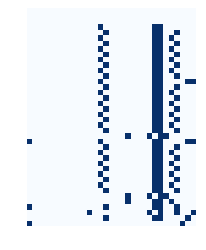

In [23]:
heatmap(encoder(data['IUPAC'][588]).reshape(40, 31))